# Modeling

* Problem Status
* Packages and Data
* Fit Model with a Training Dataset
    * Iterate over additional models
* Review Modeling Outcomes 
* Final Model & Summary

## Problem Status

Thus far, we have completed data wrangling, exploratory data analysis, and preprocessing and spliting the data.  We have also taken a quick initial look at modeling options (logistic vs linear regression), proving to ourselves that logisitic regression is a bad option (even on a feature that has been created as a categorical) and that linear regression can give us good results.  

## Packages and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import utils

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import explained_variance_score, mean_absolute_error, f1_score, confusion_matrix, accuracy_score

In [4]:
#change working directory and check what is in it
path = '/Users/gryka/Documents/GitHub/SBwork/Capstone2/Data/data_Processing.csv' #data path

#load the data
df = pd.read_csv(path)
df = df.set_index('country')
df.head()

,adult_anemia_2016,adult_blood_pressure_2015,adult_sodium_2017,basic_sanitation_2017,basic_water_2017,fruit_veg_availability_2013,government_revenue_2020,limited_sanitation_2017,limited_water_2017,nurses_and_midwives_2016,...,unimproved_water_2017,workplaces_percent_change_from_baseline,parkinson_disease_deaths,dementia_deaths,cancers_deaths,economic_rating,macroeconomic_rating,cases_per_cap,day_number,week_cat
country,,,,,,,,,,,,,,,,,,,,,
S. Korea,23.700000,10.980,5.203333,0.10,1.57,747.25,38.14,0.00,0.0,6.900000,...,0.21,-6.486413,3224.604757,29798.685258,89670.950054,3.166667,3.5,35.620943,82,3
Japan,25.600000,17.550,5.766667,1.13,0.56,425.05,38.14,0.00,0.0,6.310000,...,0.99,-13.006793,15161.514382,190560.882432,408392.273177,3.166667,3.5,49.931240,84,4
Italy,19.666667,21.170,4.050000,2.56,4.40,736.07,38.14,0.10,0.0,5.720000,...,0.56,-32.841150,7608.794566,72574.526515,182277.862996,3.166667,3.5,432.064137,86,4
Germany,18.566667,19.875,3.810000,1.99,0.20,496.91,38.14,0.77,0.0,6.186667,...,0.00,-21.465793,12619.472416,83603.200360,250892.527601,3.166667,3.5,283.413813,91,4
France,20.333333,22.050,3.813333,10.28,2.15,579.88,38.14,1.35,0.0,6.653333,...,0.00,-32.442342,7622.824664,68727.644036,180571.724245,3.166667,3.5,380.052114,91,4


## Fit Models with a Training Dataset

As seen previously, the linear regression model is given below.  This model will be compared to an optimized model and other models. Our first model shows us that we can successfully use linear regression to find our result and the logistic regression was dependent on the day feature so with the current classification set we will not be able to use this categorical method.  

In [5]:
# split and train (completed previously, reiterated here)
X_cols = list(df.columns.drop(['day_number', 'week_cat']))
y_cols = list('day_number')

# remove target variable column from the dataframe, so only the predictor variables remain
X = df.drop(['day_number', 'week_cat'], axis = 1)
y = df.day_number

#split into test/train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
expected = y_test

In [14]:
# Linear Regression model (no scaling)
model1 = LinearRegression()

# fit linear model
model1.fit(X_train, y_train)

#model prediction
pred = model1.predict(X_test)

In [19]:
# Gradient Boosting model

# looping through paramerters to find best options
#learning_rates = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
#max_features = [1,5,10,15,25]
#max_depths = [1,5,10,15,25]
#n_estimators = [1, 5, 10, 20, 25]
#for max_feature in max_features:
#for n_estimator in n_estimators:
#    gb = GradientBoostingClassifier(n_estimators=25, learning_rate = 0.05, max_features=10, max_depth = 25, random_state = 1234)
#    gb.fit(X_train, y_train)
#    print("Learning rate: ", n_estimator)
#    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
#    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
#    print()


# best values, optimized 
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.05, max_features=10, max_depth = 2)
gb.fit(X_train, y_train)

pred =gb.predict(X_test)

In [12]:
# random forest model
rfc = RandomForestClassifier(n_estimators=7, random_state = 1,n_jobs=-1)
rfc.fit(X_train, y_train)

pred = rfc.predict(X_test)

## Review Modeling Outcomes

In [10]:
def ModelOutcomes(model):
    #print('Accuracy of {}: {}'.format(model, accuracy_score(y_test, pred)))
    print('Score of {}: {}'.format(model, model.score(X, y)))
    print('EVS for {}: {}'.format(model, explained_variance_score(model.predict(X_train), y_train)))
    print('MAE for {}: {}'.format(model, mean_absolute_error(model.predict(X_train), y_train) ))
    print('RMS for {}: {}'.format(model, np.sqrt(np.mean((pred - expected) ** 2))) )


In [153]:
# model1 - linear reg outcomes
ModelOutcomes(model1)

Score of LinearRegression(): 0.7807420331930144
EVS for LinearRegression(): 0.7959342120362678
MAE for LinearRegression(): 9.114619149051451
RMS for LinearRegression(): 20.595666421615544


In [20]:
# model2 - gradient boosting outcomes
ModelOutcomes(gb)

Score of GradientBoostingClassifier(learning_rate=0.05, max_depth=2, max_features=10,
                           n_estimators=20): 0.8429752066115702
EVS for GradientBoostingClassifier(learning_rate=0.05, max_depth=2, max_features=10,
                           n_estimators=20): 1.0
MAE for GradientBoostingClassifier(learning_rate=0.05, max_depth=2, max_features=10,
                           n_estimators=20): 0.0
RMS for GradientBoostingClassifier(learning_rate=0.05, max_depth=2, max_features=10,
                           n_estimators=20): 18.685823503394225


In [21]:
#model 3 - random forest 
ModelOutcomes(rfc)

Score of RandomForestClassifier(n_estimators=7, n_jobs=-1, random_state=1): 0.8512396694214877
EVS for RandomForestClassifier(n_estimators=7, n_jobs=-1, random_state=1): 0.9981265161158123
MAE for RandomForestClassifier(n_estimators=7, n_jobs=-1, random_state=1): 0.13541666666666666
RMS for RandomForestClassifier(n_estimators=7, n_jobs=-1, random_state=1): 18.685823503394225


#### Outcome Summary

| Model | Score | Explained Variance Score | Mean Absolute Error | Root Mean Square |
| --- | --- | --- | --- | ---|
| Linear Regression | 0.78 | 0.80 | 9.11 | 20.60 |
| Gradient Boosting | 0.85 | 1.0 | 0.0 | 18.51 |
| Random Forest | 0.85 | 0.99 | 0.13 | 30.93|

## Final Model & Summary

To find our final model, we want explained variance and score that approach 1 and a low MAE.  We also need to ensure that the model is not overfit (i.e. it performs well on new data).  The Root Mean Square  for gradient boosting is higher than any of the other models so it may be appropriate to consider an alternate model.  

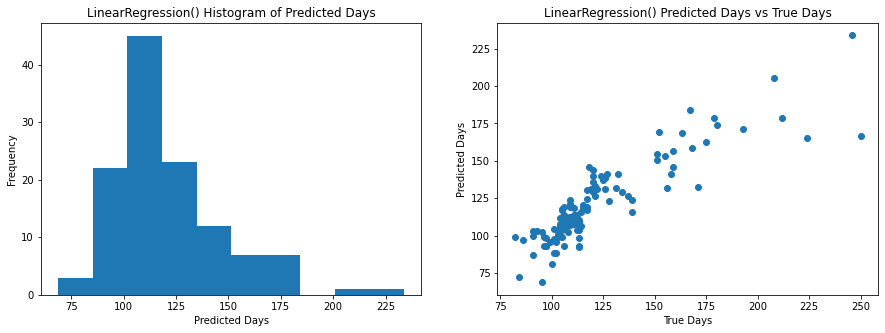

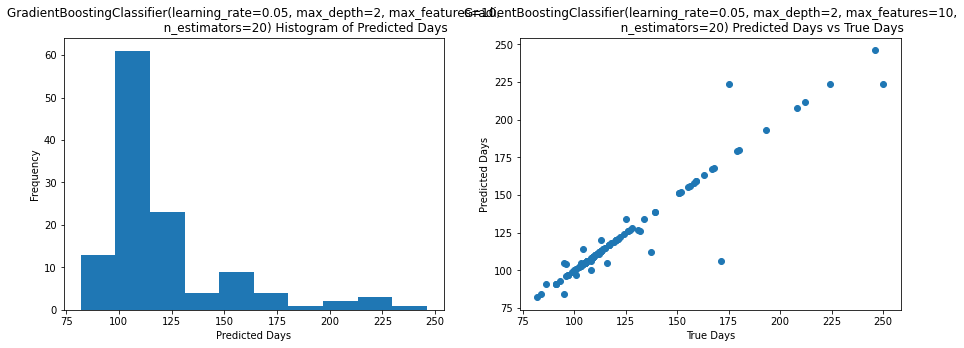

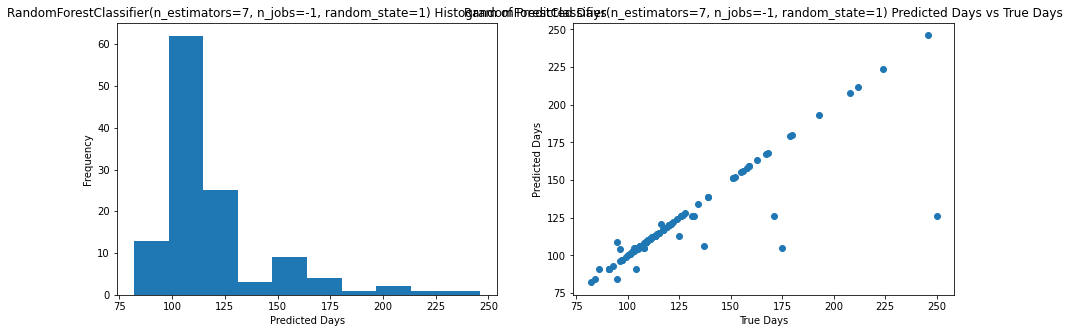

In [22]:
models = [model1, gb, rfc]
for model in models: 
    # Making subplots
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5));

    # Plotting histograms of all the predicted days
    ax1.hist(model.predict(X));

    # Labelling axis and title
    ax1.set_xlabel('Predicted Days')
    ax1.set_ylabel('Frequency')
    ax1.set_title('{} Histogram of Predicted Days'.format(model))

    # Plotting predicted days vs true days
    ax2.scatter(x = df.day_number, y = model.predict(X));

    # Labelling axis and title
    ax2.set_ylabel('Predicted Days')
    ax2.set_xlabel('True Days')
    ax2.set_title('{} Predicted Days vs True Days'.format(model));

The plots above clearly show that the gradient boosting and random forest models are overfit.  Meanwhile, the linear regression model will fit to new data better.

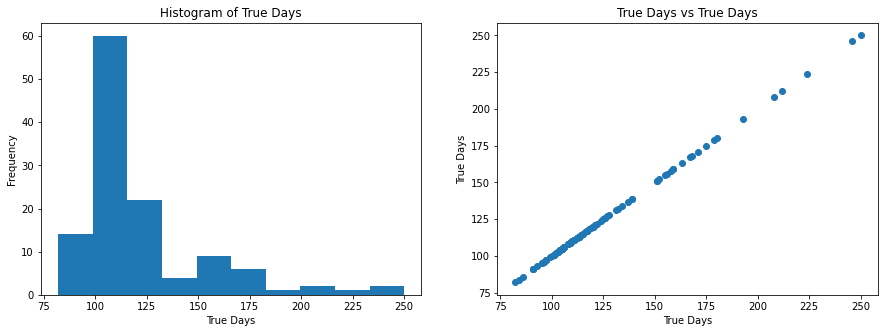

In [7]:

# Making subplots
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5));

# Plotting histograms of all the predicted days
ax1.hist(y);

# Labelling axis and title
ax1.set_xlabel('True Days')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of True Days')

# Plotting  days vs true days
ax2.scatter(x = df.day_number, y = y);

# Labelling axis and title
ax2.set_ylabel('True Days')
ax2.set_xlabel('True Days')
ax2.set_title('True Days vs True Days');